In [205]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [206]:
df=pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [207]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [209]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [210]:
df.duplicated().sum()

0

In [211]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [212]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [213]:
#Skipping EDA to only focus on the ANN Prediction and backpropagation idea.

In [214]:
df= pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

## Feature Scaling And Train Test Split.

In [215]:
x= df.drop('Exited',axis=1)
y=df['Exited']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [216]:
x_train.shape , y_train.shape

((8000, 11), (8000,))

In [217]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Tensorflow and Keras

In [218]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [219]:
model=Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [220]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_39 (Dense)             (None, 7)                 84        
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 8         
Total params: 224
Trainable params: 224
Non-trainable params: 0
_________________________________________________________________


In [221]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [222]:
history = model.fit(x_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5373 - accuracy: 0.7583 - val_loss: 0.4652 - val_accuracy: 0.7994
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4620 - accuracy: 0.7989 - val_loss: 0.4366 - val_accuracy: 0.8081
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4417 - accuracy: 0.8073 - val_loss: 0.4232 - val_accuracy: 0.8200
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4286 - accuracy: 0.8172 - val_loss: 0.4150 - val_accuracy: 0.8288
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4189 - accuracy: 0.8211 - val_loss: 0.4096 - val_accuracy: 0.8288
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.8244 - val_loss: 0.4037 - val_accuracy: 0.8388
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4032 - accuracy: 0.8303 - val_loss: 0.3970 - val_accuracy: 0.8444

In [223]:
model.layers[0].get_weights()

[array([[-2.85747886e-01,  1.50767877e-03, -2.18440801e-01,
          1.30272746e-01, -7.31745586e-02, -2.14004472e-01,
          4.04606968e-01,  4.12097275e-02,  1.64748788e-01,
         -2.65920367e-02, -1.49180830e-01],
        [ 3.41728240e-01, -7.71630824e-01,  1.22188222e+00,
         -3.56562668e-03,  6.29656613e-01, -7.16710389e-02,
          1.84738204e-01, -4.47645903e-01, -2.08260566e-01,
          7.47924149e-01, -6.73967123e-01],
        [ 2.51011545e-04,  2.00174078e-01,  5.90354484e-03,
         -1.16399471e-02,  1.58212647e-01,  3.82089823e-01,
          2.88647771e-01, -5.56673594e-02, -1.07101694e-01,
          3.77725028e-02, -3.98825668e-02],
        [ 6.49895668e-01,  2.31312424e-01,  9.37158093e-02,
         -6.13789916e-01,  6.22791111e-01,  5.01754463e-01,
         -3.73101741e-01, -2.84415245e-01,  1.52448818e-01,
         -6.27896607e-01, -6.35052741e-01],
        [-2.37404034e-01, -4.52394783e-01,  1.06317544e+00,
          4.47284989e-02,  8.50902647e-02,  

In [224]:
y_log=model.predict(x_test)

In [225]:
y_pred = np.where(y_log >0.5,1,0)

In [226]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8585

In [227]:
history.history

{'loss': [0.5373467206954956,
  0.4619627892971039,
  0.4416603147983551,
  0.4285583198070526,
  0.41894426941871643,
  0.41128331422805786,
  0.403234601020813,
  0.3944165110588074,
  0.38486191630363464,
  0.37565627694129944,
  0.3676608204841614,
  0.361083447933197,
  0.35544353723526,
  0.35144007205963135,
  0.3482445478439331,
  0.3457382619380951,
  0.3439573049545288,
  0.34238189458847046,
  0.34137535095214844,
  0.34009093046188354,
  0.3393268883228302,
  0.3380965292453766,
  0.33767834305763245,
  0.3372659981250763,
  0.3366774320602417,
  0.3359640836715698,
  0.3356100022792816,
  0.33473706245422363,
  0.334162175655365,
  0.33407965302467346,
  0.333472341299057,
  0.3326985538005829,
  0.3325376510620117,
  0.3321738839149475,
  0.3319586515426636,
  0.3314218521118164,
  0.33094605803489685,
  0.33054104447364807,
  0.3300341069698334,
  0.3299572467803955,
  0.3292350769042969,
  0.32905399799346924,
  0.3282712996006012,
  0.3284706771373749,
  0.327662348747

In [228]:
import matplotlib.pyplot as plt

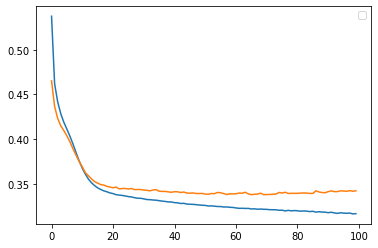

In [229]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend()
plt.show()

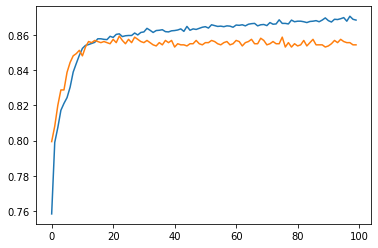

In [230]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

There is some overfitting.